## Lecture pandas basics

* pandas.Series
* pandas.Dataframe
* read_csv
* indexing
* plotting


## Pandas series

- Kan skapas från dictionary
- Kan skapas från list
- Kan skapas från np.array


In [2]:
import pandas as pd

programs_dict = dict(AI = 26, NET = 38, JAVA = 30, UX = 28)


programs_series = pd.Series(programs_dict)

programs_series

AI      26
NET     38
JAVA    30
UX      28
dtype: int64

In [3]:
# Extract values through indexing
print(f"{programs_series[0] = }") # Kommer åt värdet
print(f"{programs_series[-1] = }")

print(f"{programs_series['UX'] = }")   # Gå igenom igen

# Get keys, nycklarna är index (columns)
print(f"{programs_series.keys() = }")
print(f"{programs_series.keys()[0] = }")  # Plockar ut enskilt värde


programs_series[0] = 26
programs_series[-1] = 28
programs_series['UX'] = 28
programs_series.keys() = Index(['AI', 'NET', 'JAVA', 'UX'], dtype='object')
programs_series.keys()[0] = 'AI'


In [4]:
programs_series["AI"]  # Man kan komma åt värdet genom at

26

In [5]:
import random as rnd

rnd.seed(1337)  # Geer samma värde om man har samma seed. # Gå igeom igen"""""

dice_series = pd.Series([rnd.randint(1,6) for _ in range(10)])
dice_series


# dtype säger endast bara att den kan spara mer än 64 bitars. INTE VIKTIGT

0    5
1    5
2    6
3    3
4    5
5    5
6    6
7    2
8    3
9    4
dtype: int64

In [6]:
import random as rnd

# Rader räknas ner
# Kolumner räknas rad för rad till höger(som man läser)

# for reproductibility - get same set of values
rnd.seed(1337)  # Ger samma värde om man har samma seed. Ger samma värde varje gång

dice_series = pd.Series([rnd.randint(1,6) for _ in range(10)])
#dice_series.head()  #Gör så man kan inspektera de 5 första raderna oavsett hur stort dokument med kolumner man undersöker
dice_series

0    5
1    5
2    6
3    3
4    5
5    5
6    6
7    2
8    3
9    4
dtype: int64

In [7]:
# Man kan 
print(f"{dice_series.min() = }") # Får minsta värdet
print(f"{dice_series.argmin() = }") # gives index for min value
print(f"{dice_series.max() = }") # Får max värdet
print(f"{dice_series.argmin() = }") # average
print(f"{dice_series.argmin() = }") # sort all values in order - pick the middle one, if middle are 2 numbers calculate average of them



dice_series.min() = 2
dice_series.argmin() = 7
dice_series.max() = 6
dice_series.argmin() = 7
dice_series.argmin() = 7


## Dataframe

- tabular data with rows and colums
- analog to 2D numpy arrays with flexible row indices and col names (För numpy arrayer har vi inte olika index namn utan bara tabelldata -> kommer finnas exempel)
- "Specialized" dictionary with  coll name mapped to a Series object (Varje kolumn har en serie)

In [8]:
#pd.DataFrame(programs_series)  # Vi får en dataframe av 0:lte columnen

# Instantiated a DataFrame from a Series object (Could do it from list or dictionary aswell)
df_programs = pd.DataFrame(programs_series, columns=("Number_of_students",))  # Vi får en dataframe av 0:lte columnen
df_programs 


,Number_of_students
AI,26
NET,38
JAVA,30
UX,28


In [9]:
# Create 2 Series objects

students = pd.Series({"AI": 26, "NET": 38, "UX": 28, "JAVA": 30})
skills = pd.Series({"AI": "Python", "net": "C#", "UX": "Figma", "JAVA": "Java"})


# Create a DataFrame from 2 Series objects
df_programs = pd.DataFrame({"Students": students, "Skills": skills}) 
df_programs  # Får tabullär data

#Vi har samma datatype hela vägen, vi har inte kolumn namn, vi har kolumn
# Varje kolumn-namn är en mapin() till en pandas series
# Specialized dictionary
# NET gives NaN because the index is not the same

,Students,Skills
AI,26.0,Python
JAVA,30.0,Java
NET,38.0,NaN
UX,28.0,Figma
net,NaN,C#


In [10]:
df_programs["Students"]

# Look at dtype, python has changed (typomvandlat) to flyttal
# Eftersom den är NaN över så får vi en annan datatype

AI      26.0
JAVA    30.0
NET     38.0
UX      28.0
net      NaN
Name: Students, dtype: float64

In [11]:
df_programs["Students"].mean(), (26+30+38+28)/4 # Ger medelvärdet, sista parentesen förtydligar detta

(30.5, 30.5)

In [12]:
median_student_number = df_programs["Students"].median()
print(f"Median students in the programs{df_programs.index.to_list()} is {median_student_number:.0f}")

Median students in the programs['AI', 'JAVA', 'NET', 'UX', 'net'] is 29


We have extracted information from the tablet from the 5 classes, we have calculated the median

In [13]:
df_programs["Skills"] # I get a series, notice dtype object

AI      Python
JAVA      Java
NET        NaN
UX       Figma
net         C#
Name: Skills, dtype: object

In [14]:
df_programs["Skills"][0] # I get a series, notice dtype object

'Python'

In [15]:
df_programs["Skills"][0], df_programs["Skills"]["AI"], df_programs["Skills"]["UX"]

('Python', 'Python', 'Figma')

## Indexers
- loc
Slicing and indexing using explicit index

- iloc
Motsvarande. slicing and indexing using 


In [16]:
df_programs.loc["AI"] #Returns a Series Object

Students      26.0
Skills      Python
Name: AI, dtype: object

In [17]:
df_programs.loc["JAVA"]

Students    30.0
Skills      Java
Name: JAVA, dtype: object

In [18]:
df_programs.loc[["AI", "UX"]]  # Här ändras formatteringen till en DataFrame

,Students,Skills
AI,26.0,Python
UX,28.0,Figma


In [19]:
#Index location, Testa skriva 1:4 t ex för att få 
df_programs.iloc[1:3] # Returns a DataFrame object

,Students,Skills
JAVA,30.0,Java
NET,38.0,NaN


## Masking

In [20]:
df_programs

,Students,Skills
AI,26.0,Python
JAVA,30.0,Java
NET,38.0,NaN
UX,28.0,Figma
net,NaN,C#


In [21]:
df_programs["Students"] >= 30  # Har fler än 30

AI      False
JAVA     True
NET      True
UX      False
net     False
Name: Students, dtype: bool

In [22]:
# Using masking to filter the DataFrame
# Här får jag ut min filtrerade dataframe using Masking with values above 30

df_programs[df_programs["Students"] >= 30]

,Students,Skills
JAVA,30.0,Java
NET,38.0,NaN


In [23]:
df_programs # Om jag skriver det här får jag fortfarande ut originalet

,Students,Skills
AI,26.0,Python
JAVA,30.0,Java
NET,38.0,NaN
UX,28.0,Figma
net,NaN,C#


In [24]:
df_programs_over_29 = df_programs[df_programs["Students"] >= 30]  #Här har jag tilldelat det uppdaterade värdet till en ny.
df_programs_over_29

,Students,Skills
JAVA,30.0,Java
NET,38.0,NaN


----
## Excel data



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("../Data/calories.xlsx")
df.head()  # Sees the first 5 rows and columns. We can also see it has 5 columns(could have been more columns so its not capped to 5)


,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [26]:
df.info() 
# Gives a short summary
# We see that they are objects 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [27]:
df.shape  # See rows(2225) and columns(5)

(2225, 5)

In [28]:
# We see liquid food and solid food
df["FoodCategory"].unique()  #We can see this category what unique values it is

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [29]:
df["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning and explorations

----- What to do with our file? ------
- type convert our string objects with numerical values -> int
- change column names
- separate into liquids and solids


Maybe we want to see the difference between ### Skriv igen

In [30]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [31]:
# renaming columns / ändra namn på kolumner
df = df.rename(
    dict(Cals_per100grams="Calories", KJ_per100grams="kJ", per100grams="per100"),
    axis="columns",
)

df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [32]:
## ------ Ska bli Error här!

df["Calories"].astype(int) # Vi får ett serieobjekt

# Sedan så vill vi ändra typen på värdet till t ex en int.
# notera att detta går inte, pga att om vi kollar på Calories så har den en int + string.

ValueError: invalid literal for int() with base 10: '62 cal'

In [ ]:
# converting Calories to int
df["Calories"] = df["Calories"].str[:-3].astype(int)
# Vi plockar ut Serien, i den kör vi string metoden -> slicar vid position -3, sedan typomvandlar vi till en int

# Vi plockar ut alla värden förutom de 3 sista.
# .astype(int) Nu går det att typomvandla till dtype och int
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [ ]:
df["Calories"].head()
# Nu ser vi att Calories är dtype int, snyggt!

0    62
1    48
2    92
3    88
4    54
Name: Calories, dtype: int32

In [ ]:
# Counts the frequency of each unique of each element
df["per100"].value_counts()
# Value_counts räkna unika ggr hur många gånger respektive ml och g visas:
# (1802ggr = 100g)
# (423ggr = 100ml)


100g     1802
100ml     423
Name: per100, dtype: int64

In [ ]:
# TODO: Seperate liquids and solids
# TODO: filter out all solids
df["per100"]

# TODO: filter out all liquids

0       100g
1       100g
2       100g
3       100g
4       100g
        ... 
2220    100g
2221    100g
2222    100g
2223    100g
2224    100g
Name: per100, Length: 2225, dtype: object

In [ ]:
df["per100"] == "100g" # Vi får nu ett visst antal True, ett visst antal false

0       True
1       True
2       True
3       True
4       True
        ... 
2220    True
2221    True
2222    True
2223    True
2224    True
Name: per100, Length: 2225, dtype: bool

In [ ]:
# TODO: Seperate liquids and solids
# TODO: filter out all solids
(df["per100"] == "100g").value_counts()  # Vi får nu ett visst antal True, ett visst antal false

# TODO: filter out all liquids

True     1802
False     423
Name: per100, dtype: int64

In [ ]:
# TODO: Seperate liquids and solids

# TODO: filter out all solids
df_solids = df[df["per100"] == "100g"] 
# Nu ser vi att vi har 1802 rows. och all dem har 100g i dem
#df_solids



# TODO: filter out all liquids
df_liquids = df[df["per100"] == "100ml"] 
# Nu ser vi att df_liquids har 423 rows
#df_liquids


df_liquids.head()

,FoodCategory,FoodItem,per100,Calories,kJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ


In [ ]:
# Checks that we only have 100g in per100
df_solids["per100"].value_counts()


100g    1802
Name: per100, dtype: int64

## Assignment from stakeholder (arbitrary, bodybuilder)

- Find the most calory rich solid
- Find the most calory rich liquids

In [ ]:
df_solids.info()  # Om vi kör .info så ser vi att kalorier är int

# Eftersom det är ints så kan vi sortera, 
# och vi kan då t ex plocka ut 5 största 5 minsta utan bekymmer


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1802 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FoodCategory  1802 non-null   object
 1   FoodItem      1802 non-null   object
 2   per100        1802 non-null   object
 3   Calories      1802 non-null   int32 
 4   kJ            1802 non-null   object
dtypes: int32(1), object(4)
memory usage: 77.4+ KB


In [ ]:
# One way to sort 
df_solids.sort_values(by="Calories") # = True lägsta först

,FoodCategory,FoodItem,per100,Calories,kJ
1816,BakingIngredients,Baking Soda,100g,0,0 kJ
2043,Herbs&Spices,Stevia,100g,0,0 kJ
2004,Herbs&Spices,Garlic Salt,100g,0,0 kJ
2040,Herbs&Spices,Sea Salt,100g,0,0 kJ
2038,Herbs&Spices,Salt,100g,0,0 kJ
...,...,...,...,...,...
675,Pork,Lard,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ


In [ ]:
solids_sorted_calories = df_solids.sort_values(by="Calories", ascending = False ) # (ascending) Sorterar högsta först


solids_sorted_calories.iloc[:10]  # Samma som att göra .head() fast du kan skriva in hur många rows du vill få fram


,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
675,Pork,Lard,100g,898,3772 kJ
1897,BakingIngredients,Vegetable Oil,100g,884,3713 kJ
1898,BakingIngredients,Vegetable Shortening,100g,884,3713 kJ
527,Beef&Veal,Beef Suet,100g,854,3587 kJ
1768,Oils&Fats,Real Butter,100g,720,3024 kJ


In [ ]:
solids_top5_calories = solids_sorted_calories.head()
solids_top5_calories

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [ ]:
liquids_top5_calories = df_liquids.sort_values(by="Calories", ascending = False).head()
liquids_top5_calories

,FoodCategory,FoodItem,per100,Calories,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


In [ ]:
df["FoodCategory"].value_counts()  
# Here we see that we have a lot of different food categories


BakingIngredients                95
Cakes&Pies                       91
Herbs&Spices                     90
Beer                             85
Candy&Sweets                     81
Pastries,Breads&Rolls            78
Dishes&Meals                     78
Oatmeal,Muesli&Cereals           76
FastFood                         72
Vegetables                       63
Legumes                          62
Fish&Seafood                     60
Fruits                           54
Sauces&Dressings                 54
Cheese                           53
Soups                            52
Non-AlcoholicDrinks&Beverages    51
AlcoholicDrinks&Beverages        48
Sausage                          47
(Fruit)Juices                    46
Meat                             46
IceCream                         45
Soda&SoftDrinks                  45
CerealProducts                   44
Pizza                            43
Pasta&Noodles                    40
Yogurt                           40
Nuts&Seeds                  

In [ ]:
# Top five food categories by calories

# mean(medelvärde av kategori), #sorterar Calories notera från ascending(False), # ascending för vi vill se top5
top5_category_mean = df.groupby("FoodCategory").mean("Calories").sort_values(by = "Calories", ascending=False).head().reset_index()
# mean gör att vi får medelvärde av respektive kategori (går också att köra medianen)
# groupby grupperar alla som har samma namn, t ex 17 CreamCheese

# reset index(obs du kan kommentera bort den för att testa) eftersom vi vill ha "FoodCategory" som en egen kolumn, inte ett index



# Sidenote -> Vi har nu en typ av numerisk(Calories). Om vi skulle ha flera så går det också att "hämta"
top5_category_mean

,FoodCategory,Calories
0,VegetableOils,875.363636
1,Oils&Fats,819.766667
2,Nuts&Seeds,439.794872
3,Candy&Sweets,424.592593
4,Spreads,382.205128


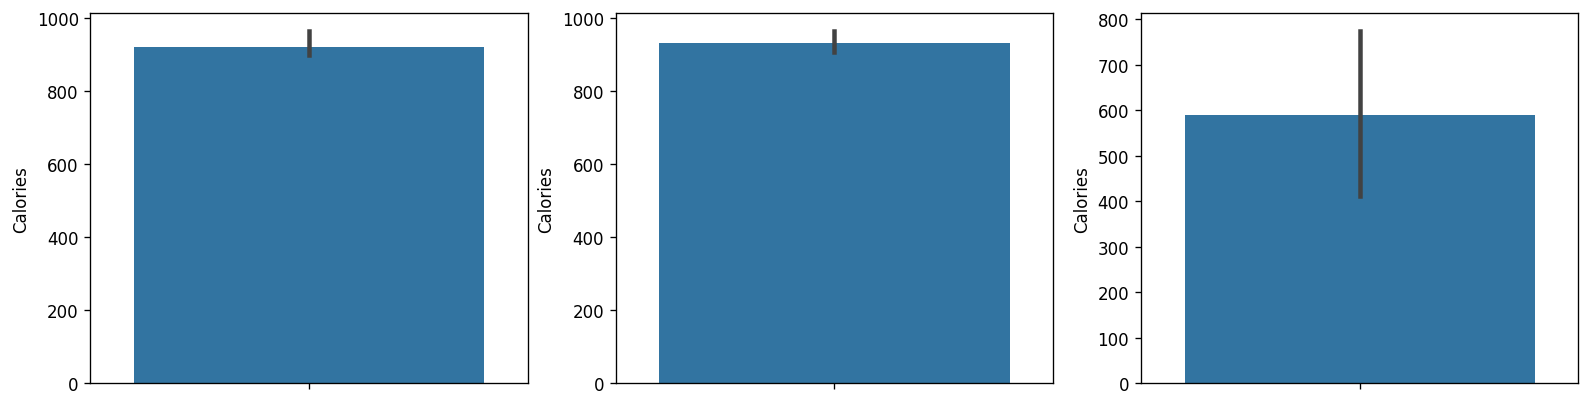

In [ ]:
# Dags att plotta 

fig, axes = plt.subplots(1,3, figsize = (16,4), dpi=120)  # We get 3 subplots(figurer)
titles = ["Solid top 5 calories", "Liquids top 5 calories", "Top 5 calories per group (mean)"]
data_frames = (solids_top5_calories, liquids_top5_calories, top5_category_mean)


# Vi vill loopa igenom titles och dataframes samtidigt
# Vi vill ha ett i här = för index
# Vi vill ha data och title som kommer från zipen
for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, y = "Calories", ax = axes[i])

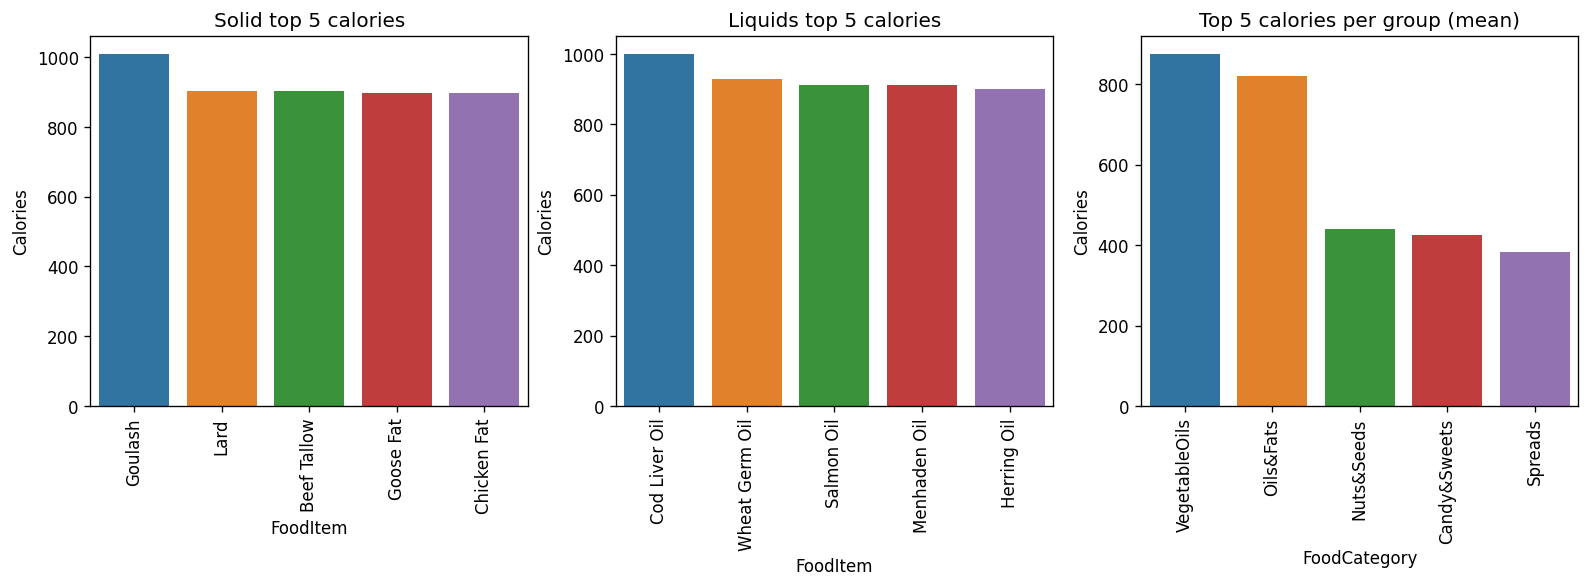

In [ ]:
# Dags att plotta 

fig, axes = plt.subplots(1,3, figsize = (16,4), dpi=120)  # We get 3 subplots(figurer)
titles = ["Solid top 5 calories", "Liquids top 5 calories", "Top 5 calories per group (mean)"]
data_frames = (solids_top5_calories, liquids_top5_calories, top5_category_mean)
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]

# Vi vill loopa igenom titles och dataframes samtidigt
# Vi vill ha ett i här = för index
# Vi vill ha data och title som kommer från zipen
for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x = x_columns[i], y = "Calories", ax = axes[i]) #sns plockar in en data som skulle kunna vara en dataframe
    axes[i].set(title = title) # Vi får titlarna
    axes [i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)

# This is not uncommon to use a subplot loop to plot multiple at once


# Här sparar vi plotten i assets
plt.savefig("../assets/top_calories_food.png", facecolor = "white", bbox_inches = "tight")
